The below function simulates a Snakes and ladders game over large number of trials using Monte Carlo method, it saves the number of snakes and ladders occurences in each game so further calculations can be done.

To simulate randomness of the dice we are using python random library. Note: this is only pseudo-random as true random is almost impossible to achieve.




Average number of rolls: 35.9756
Minimum number of rolls from our trials: 7
Maximum number of rolls from our trials: 234
Median number of rolls from our trials: 29.0
Most likely number of rolls from our trials: 19
Average number of ladders encountered per game: 3.2083
Average number of snakes encountered per game: 3.9743
probability of getting most likely rolls: 0.032


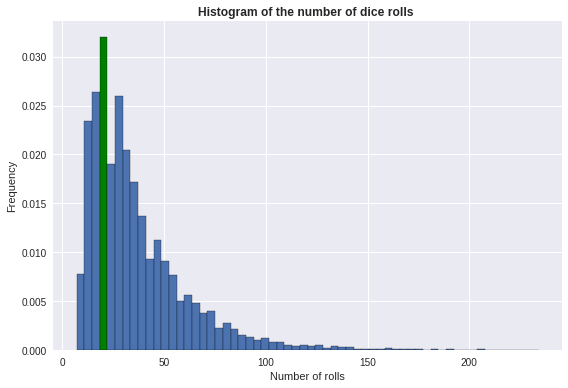

In [ ]:

import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use("seaborn")
from statistics import mean,median,mode,stdev
from sklearn.preprocessing import normalize
from matplotlib.ticker import PercentFormatter
import math
import numpy as np


random.seed(11)
ladders = {
    1:38,
    4:14,
    9:31,
    21:42,
    28:84,
    36:44,
    51:67,
    80:100,
    71:91
}

snakes = {
    16:6,
    47:26,
    49:11,
    56:53,
    62:19,
    64:60,
    87:24,
    93:73,
    95:75,
    98:78
}


def single_game():
  #simulating a single game from start to finish
  position = 0
  rolls = 1
  snakes_num = 0
  ladders_num = 0
  odd_dice = 0
  heat_map = np.zeros(100, dtype='int') # saving a 10x10 matrix for heatmap
  pos_arr = [] # array that holds all the positions when the dice rolls
  pos_arr_final =[] # array that holds all the positions when the dice rolls and when the player goes through snakes/ladders
  dice = random.randint(1, 6) # simulating dice pseudo-randomly
  position += dice
  pos_arr.append(position)
  pos_arr_final.append(position)
  snakes_arr = []
  ladders_arr= []




  while position < 100:


    if position in ladders:
      ladders_arr.append(position)
      position = ladders[position]
      heat_map[position-1] += 1
      pos_arr_final.append(position)
      #for the positions 80 as it leads directly to 100
      if position == 100:
        break
    elif position in snakes:
      snakes_arr.append(position)
      position = snakes[position]
      heat_map[position-1] += 1
      pos_arr_final.append(position)
      snakes_num +=1


    dice = random.randint(1, 6)

    position += dice


# if position greater than or equal to 100 the game is finished
    if position >= 100:
        heat_map[99] += 1
        pos_arr.append(100)
        pos_arr_final.append(100)
        rolls +=1
        break

    else:
        heat_map[position-1] += 1
        pos_arr.append(position)
        pos_arr_final.append(position)
        rolls +=1

  return rolls, snakes_num,ladders_num,position,pos_arr,heat_map,snakes_arr,ladders_arr,pos_arr_final


trial = 10000
rolls_t = []
snake_t = []
ladders_t = []
positions_t = []
pos_arr_final_t =[]
snakes_pos =[]
ladders_pos = []
total_squares = np.zeros(100, dtype=int)


# repeat game for trial number of times
for i in range(trial):
  rolls, snakes_num,ladders_num,position,pos_arr,heat_map,snakes_arr,ladders_arr,pos_arr_final = single_game()
  rolls_t.append(rolls)
  snake_t.append(snakes_num)
  ladders_t.append(ladders_num)
  positions_t.append(pos_arr)
  total_squares += heat_map
  #list of positions of ladders encountered in every trial
  ladders_pos.extend(ladders_arr)
  #list of positions of snakes encountered in every trial
  snakes_pos.extend(snakes_arr)
  #lists of lists of all the positions encountered in each trial
  pos_arr_final_t.append(pos_arr_final)





#average
print('Average number of rolls:',mean(rolls_t))
#minimum
print('Minimum number of rolls from our trials:',min(rolls_t))
#max
print('Maximum number of rolls from our trials:',max(rolls_t))
#median
print('Median number of rolls from our trials:',median(rolls_t))
#mode
print('Most likely number of rolls from our trials:',mode(rolls_t))

print('Average number of ladders encountered per game:',len(ladders_pos)/trial)

print('Average number of snakes encountered per game:',len(snakes_pos)/trial)


def frq(lis):
  #gets the frequency of each value in list : List -> Dictionary
  f = {}
  for i in lis:
    if i in f:
      f[i] +=1
    else:
      f[i] = 1
  return f


#get the probability of the most likely rolls
d = frq(rolls_t)
#gets the key of the most occurences of rolls
max_rolls = max(d,key=d.get)
print('probability of getting most likely rolls:',(d[max_rolls]/trial))


#plotting histogram for distribution of rolls
n, bins, patches=plt.hist(rolls_t,bins=60,edgecolor='black',density='1')
plt.xlabel('Number of rolls')
plt.ylabel('Frequency')
plt.title('Histogram of the number of dice rolls ',
          fontweight ="bold")
plt.setp(patches[3], 'facecolor', 'g')
plt.show()




In [ ]:
snake_p = list(snakes.values())
snake_l = list(snakes.keys())
res = [i - j for (i, j) in zip(snake_l, snake_p)]
print('average blocks skipped by snakes:',mean(res))
print('Max blocks skipped by snakes:',max(res))
print('min blocks skipped by snakes:',min(res))
ladders_p = list(ladders.values())
ladders_l = list(ladders.keys())
res = [i - j for (i, j) in zip(ladders_p, ladders_l)]
print('average blocks skipped by ladders:',mean(res))
print('max blocks skipped by ladders:',max(res))
print('min blocks skipped by ladders:',min(res))



#the number of blocks the ladder moves front and the number of blocks the snakes move the position back is approximately the same however there is a higher number of snakes than
#ladders so the probability of enocuntering a snake is higher


average blocks skipped by snakes: 24.2
Max blocks skipped by snakes: 63
min blocks skipped by snakes: 3
average blocks skipped by ladders: 23.333333333333332
max blocks skipped by ladders: 56
min blocks skipped by ladders: 8


Notice our histogram is heavily skewed towards the left, this makes sense as the average number of ladders encountered per game is 3.2, and the by random affect of the dice the we are progressing > 1 block at a time.

Also notice the the average number of snakes and ladders encountered per game is approximately the same so the random effect of the dice will make sure we are progressing across the board fast.

Our mean approximately true because of the law of Large numbers and the effect of the central limit theorem.

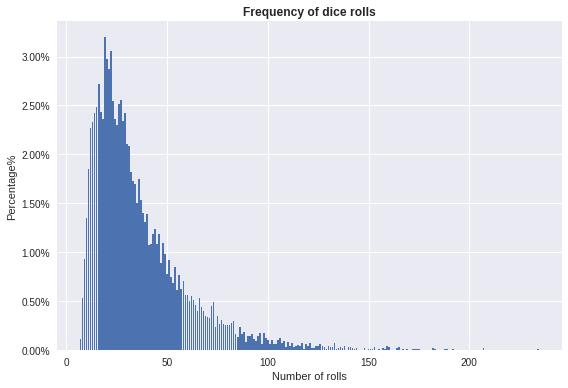

In [ ]:
res = list(d.values())
res = [a/trial for a in res]
plt.xlabel('Number of rolls')
plt.ylabel('Percentage%')
plt.title('Frequency of dice rolls',
          fontweight ="bold")
plt.bar(list(d.keys()),res)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))


## Around how many games should the simulation run for to approach the convergence result by +/-0.3% for Q4?


In [ ]:
#q5
#using formula of standard error
ans_arr =[]
#d[max_rolls]/trial gets probability of modal number
print('Needed trials:',d[max_rolls]/trial*(1-d[max_rolls]/trial)/((0.003)**2))

i =1
ans = math.inf
while ans > 0.003:
  ans = math.sqrt((d[max_rolls]/trial*(1-d[max_rolls]/trial)/i))
  ans_arr.append(ans)
  i += 1

plt.xlabel('Trials')
plt.ylabel('Error')
plt.title('Trials needed to reach modal number',
          fontweight ="bold")
plt.plot(ans_arr)






NameError: ignored

In [ ]:
#board values for annotations
l = [ ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], ['20', '19', '18', '17', '16', '15', '14', '13', '12', '11'],[ '21', '22', '23', '24', '25', '26', '27', '28', '29', '30'], ['40', '39', '38', '37', '36', '35', '34', '33', '32', '31'], ['41', '42', '43', '44', '45', '46', '47', '48', '49', '50'], ['60', '59', '58', '57', '56', '55', '54', '53', '52', '51'], ['61', '62', '63', '64', '65', '66', '67', '68', '69', '70'], ['80', '79', '78', '77', '76', '75', '74', '73', '72', '71'], ['81', '82', '83', '84', '85', '86', '87', '88', '89','90'], ['100','99', '98', '97', '96', '95', '94', '93', '92', '91']]
l = l[::-1]

# Are all snakes and all ladders equally likely to be stepped on over many games? Let's visualise this with a heatmap

most frequent snake block: 47


[Text(6.800000000000004, 0.5, ''),
 Text(0.5, 6.799999999999983, ''),
 Text(0.5, 1.0, 'Most landed on Snake blocks')]

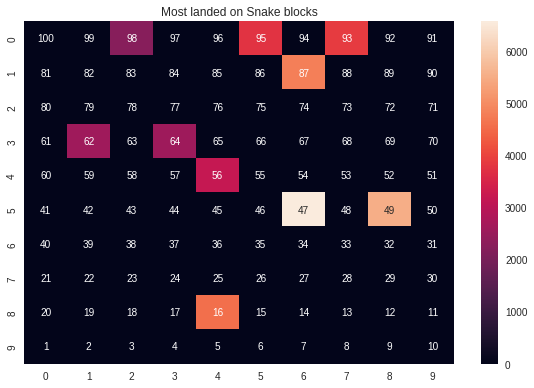

In [ ]:
#Snake
max_snake = max(frq(snakes_pos),key=frq(snakes_pos).get)
print('most frequent snake block:',max_snake) # maximum is in position 47;
heat_map_snake = np.zeros(100, dtype='int')
for i in snakes_pos:
  heat_map_snake[i-1] += 1
board_heatmap = np.asarray(heat_map_snake).reshape(10,10) # to simulate the board
board_heatmap = np.flip(board_heatmap, axis=0)
d = pd.DataFrame(board_heatmap)
d.iloc[::2,:] = d.iloc[::2, ::-1]
ax = sns.heatmap(d,annot=l,fmt="")
ax.set(xlabel="", ylabel="",title='Most landed on Snake blocks')




most frequent ladders block: 28


[Text(6.800000000000004, 0.5, ''),
 Text(0.5, 6.800000000000026, ''),
 Text(0.5, 1.0, 'Most landed on Ladder blocks')]

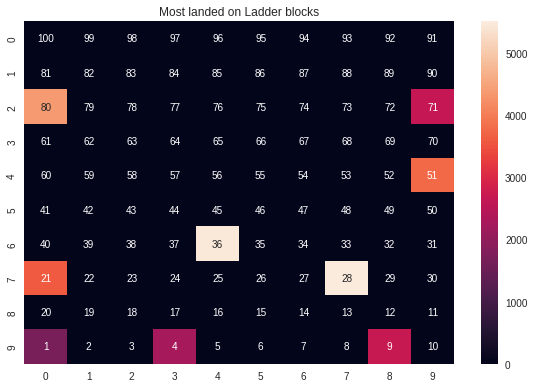

In [ ]:
#Ladders
max_ladders = max(frq(ladders_pos),key=frq(ladders_pos).get)
print('most frequent ladders block:',max_ladders)

heat_map_ladders = np.zeros(100, dtype='int')

for i in ladders_pos:
  heat_map_ladders[i-1] += 1

board_heatmap = np.asarray(heat_map_ladders).reshape(10,10) # to simulate the board
board_heatmap = np.flip(board_heatmap, axis=0)
d = pd.DataFrame(board_heatmap)
d.iloc[::2,:] = d.iloc[::2, ::-1]

ax = sns.heatmap(d,annot=l,fmt="")
ax.set(xlabel="", ylabel="",title='Most landed on Ladder blocks')

# Bonus + extra explorations I found interesting

### Visualize an example each of a victory with the minimum number of rolls,with a typical number of rolls and a relatively high number of rolls

min: [4, 14, 19, 24, 28, 84, 90, 94, 100] 
 max: [2, 4, 14, 18, 23, 24, 25, 27, 33, 34, 36, 44, 46, 49, 11, 12, 17, 21, 42, 44, 47, 26, 32, 35, 37, 43, 45, 50, 54, 56, 53, 54, 59, 62, 19, 23, 26, 31, 37, 38, 43, 49, 11, 13, 16, 6, 7, 11, 14, 18, 24, 30, 35, 38, 41, 43, 44, 50, 52, 53, 57, 62, 19, 24, 29, 35, 40, 41, 45, 49, 11, 13, 16, 6, 12, 16, 6, 8, 10, 14, 15, 18, 20, 24, 27, 32, 33, 39, 42, 48, 53, 54, 59, 62, 19, 25, 30, 34, 36, 44, 48, 54, 56, 53, 57, 60, 62, 19, 20, 25, 31, 36, 44, 48, 52, 55, 59, 62, 19, 20, 25, 26, 32, 36, 44, 50, 55, 56, 53, 56, 53, 55, 56, 53, 58, 59, 60, 62, 19, 21, 42, 43, 47, 26, 30, 31, 36, 44, 48, 49, 11, 17, 18, 20, 24, 30, 36, 44, 45, 47, 26, 29, 33, 37, 43, 47, 26, 29, 30, 31, 33, 37, 38, 42, 47, 26, 29, 31, 35, 39, 43, 47, 26, 27, 30, 32, 37, 40, 43, 47, 26, 27, 28, 84, 87, 24, 26, 31, 37, 39, 43, 49, 11, 12, 17, 22, 24, 25, 31, 37, 41, 43, 49, 11, 13, 16, 6, 9, 31, 33, 39, 43, 47, 26, 30, 34, 36, 44, 49, 11, 15, 19, 25, 28, 84, 87, 24, 27, 32, 35,

[Text(6.800000000000001, 0.5, ''),
 Text(0.5, 6.800000000000029, ''),
 Text(0.5, 1.0, 'Positions with minimum number of rolls')]

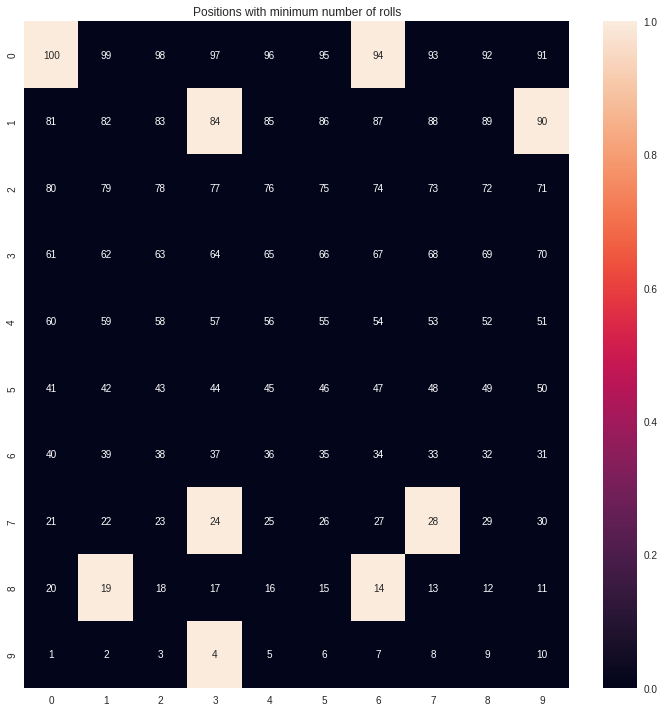

In [ ]:
def find_list_stats(list):
  #finds the min, max, mode victory wins and gets their index from list
    list_len = [len(i) for i in list]
    pos_min= list_len.index(min(list_len))
    pos_max= list_len.index(max(list_len))
    pos_mode= list_len.index(mode(list_len))
    return pos_min,pos_max,pos_mode

pos_min_ind,pos_max_ind,pos_mode_ind = find_list_stats(pos_arr_final_t)

print('min:',pos_arr_final_t[pos_min_ind],'\n','max:',pos_arr_final_t[pos_max_ind],'\n','mode:',pos_arr_final_t[pos_mode_ind])
heat_map_min = np.zeros(100, dtype='int')
heat_map_max = np.zeros(100, dtype='int')
heat_map_mode = np.zeros(100, dtype='int')

for i in pos_arr_final_t[pos_min_ind]:
  heat_map_min[i-1] += 1

for i in pos_arr_final_t[pos_max_ind]:
  heat_map_max[i-1] += 1

for i in pos_arr_final_t[pos_mode_ind]:
  heat_map_mode[i-1] += 1

#visulising the game with minimum number of rolls
board_heatmap = np.asarray(heat_map_min).reshape(10,10) # to simulate the board
board_heatmap = np.flip(board_heatmap, axis=0)
d = pd.DataFrame(board_heatmap)
d.iloc[::2,:] = d.iloc[::2, ::-1]
ax = sns.heatmap(d,annot=l,fmt="")
ax.set(xlabel="", ylabel="",title='Positions with minimum number of rolls')



The minimum is starts with 4, let's see what are the average attempts we get before we can get our 10th 4.



In [ ]:
#
ll = np.random.negative_binomial(10,1/6,10000)
print(ll.mean())



49.8687


So approximately for every 50 rolles we can get hope to get 10 4's in our dices

[Text(6.800000000000001, 0.5, ''),
 Text(0.5, 6.800000000000029, ''),
 Text(0.5, 1.0, 'Positions with higher number of rolls')]

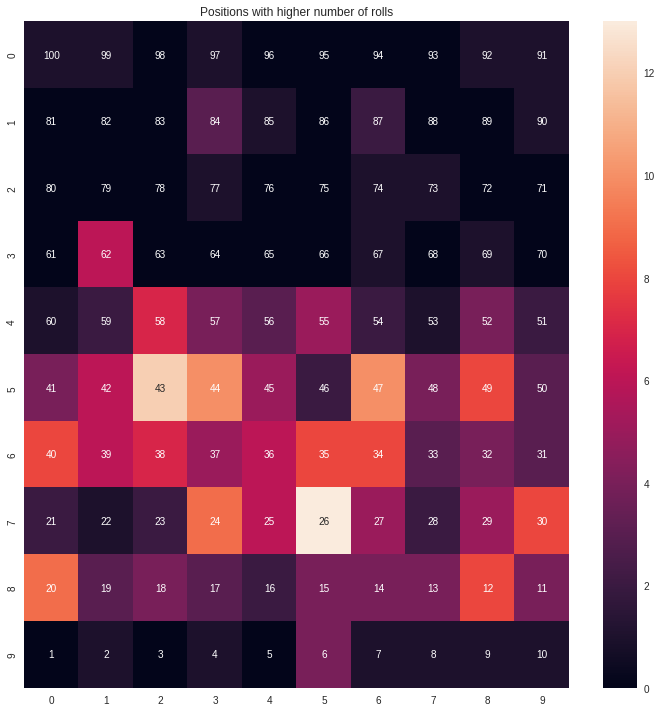

In [ ]:
board_heatmap = np.asarray(heat_map_max).reshape(10,10) # to simulate the board
board_heatmap = np.flip(board_heatmap, axis=0)
d = pd.DataFrame(board_heatmap)
d.iloc[::2,:] = d.iloc[::2, ::-1]
ax = sns.heatmap(d,annot=l,fmt="")
ax.set(xlabel="", ylabel="",title='Positions with higher number of rolls')



Notice our heatmap is more colorful and by comparison we can see that the lower and top half of the board is lighter this means there is a higher chance of landing in each block more than once; with row 1 and 2 being fairly more lighter than the rest. This shows that there is higher probability of being stuck in those two rows and to prevent you from reaching the final row to win the game. With 78 being the most landed, not only from the block but also because the snake at 98 drops it down to 78.



[Text(6.800000000000001, 0.5, ''),
 Text(0.5, 6.800000000000029, ''),
 Text(0.5, 1.0, 'Positions with average number of rolls')]

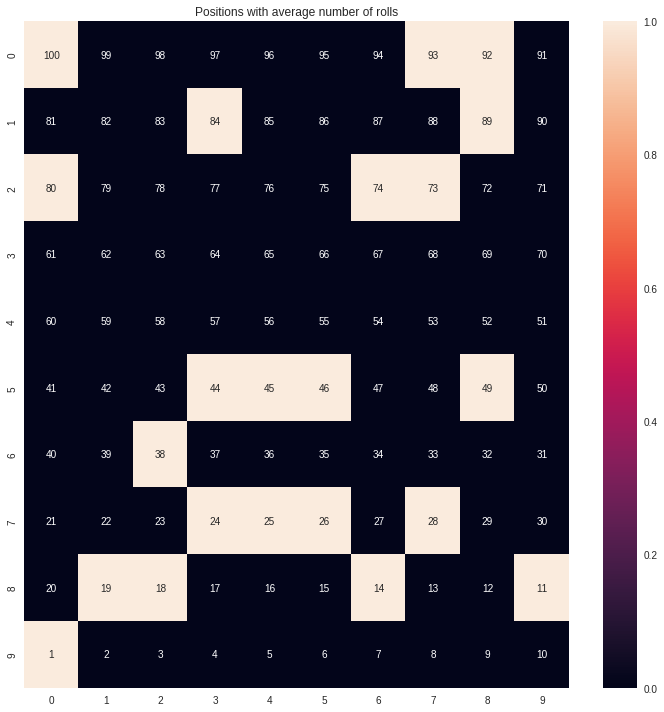

In [ ]:
#one of the most average methods.

board_heatmap = np.asarray(heat_map_mode).reshape(10,10) # to simulate the board
board_heatmap = np.flip(board_heatmap, axis=0)
d = pd.DataFrame(board_heatmap)
d.iloc[::2,:] = d.iloc[::2, ::-1]
ax = sns.heatmap(d,annot=l,fmt="")
ax.set(xlabel="", ylabel="",title='Positions with average number of rolls')


Even in one of the most average methods with average number of rolls, blocks are only visited once.

## Question: Does adding snakes always increase roll count ?

Hypothesis: yes it does, as it moves the position down the board, thus increasing roll count

In [ ]:
#Question: Does adding snakes increase roll count ?
rolls= 0
position = 0
i=0
random.seed(18)
snake = {}
roll_snake_arr =[]
while len(snake)< len(snakes):
  #i = random.randint(0, len(snakes)-1)
  for i in range(len(snakes)):
    key = list(snakes)[i]
    val = list(snakes.values())[i]
    snake[key] = val
    for _ in range(1000000):
      while position <= 100:

        dice = random.randint(1, 6)
        rolls += 1

        if dice in snake:
          position = snake[i]
        else:
          position += dice
          if position >= 100:
            rolls +=1
            break

      roll_snake_arr.append(rolls)


print(max(roll_snake_arr))
print(min(roll_snake_arr))
print(mean(roll_snake_arr))










33
31
32.9999998


Conclusion: not always, by going back down the board we may encounter a ladder we havent before and thus decresing our roll count

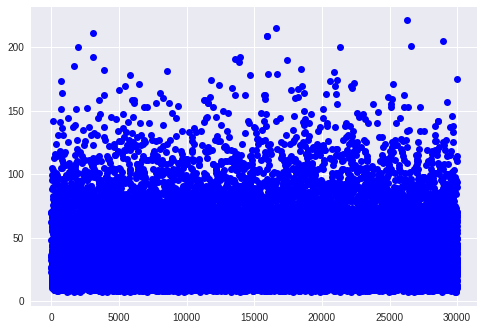

In [ ]:
#seeing what the outliers are like

plt.plot(rolls_t,'ob')


Probability that we will finish the game with 1-10 rolls: 0.03308615075129248
Probability that we will finish the game with 1-25 rolls: 0.38091731207992124
Probability that we will finish the game with 1-50 rolls: 0.8044133495089378
Probability that we will finish the game with 1-100 rolls: 0.9782072553728635


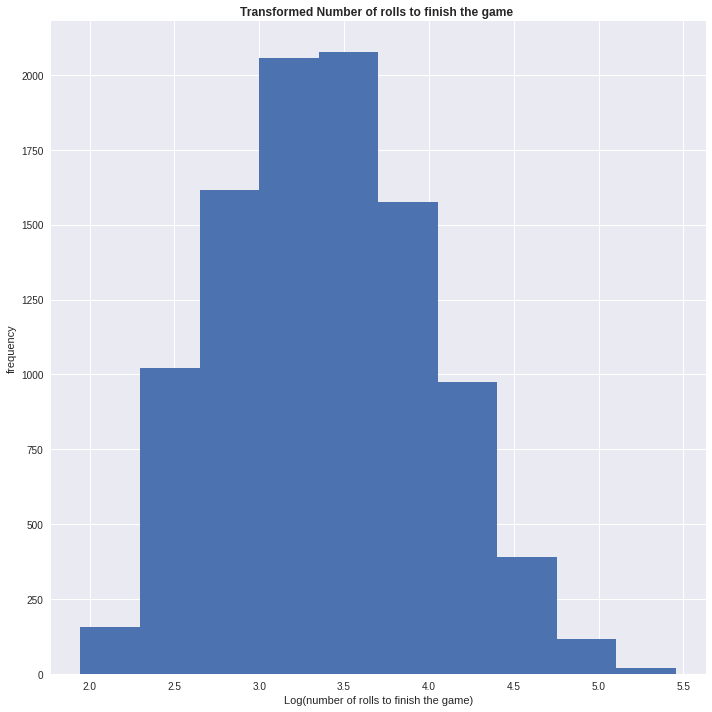

In [ ]:
import scipy.stats as ss

#log transform the data
#as you can see our data is heavily skewed
b= []
for i in rolls_t:
  b.append(math.log(i))

plt.hist(b)
plt.xlabel('Log(number of rolls to finish the game)')
plt.ylabel('frequency')
plt.title('Transformed Number of rolls to finish the game ',
          fontweight ="bold")


# finding the probability using cdf
print('Probability that we will finish the game with 1-10 rolls:',ss.norm.cdf(math.log(10), mean(b), stdev(b)) - ss.norm.cdf(math.log(1), mean(b), stdev(b)))
print('Probability that we will finish the game with 1-25 rolls:',ss.norm.cdf(math.log(25), mean(b), stdev(b)) - ss.norm.cdf(math.log(1), mean(b), stdev(b)))
print('Probability that we will finish the game with 1-50 rolls:',ss.norm.cdf(math.log(50), mean(b), stdev(b)) - ss.norm.cdf(math.log(1), mean(b), stdev(b)))
print('Probability that we will finish the game with 1-100 rolls:',ss.norm.cdf(math.log(100), mean(b), stdev(b)) - ss.norm.cdf(math.log(1), mean(b), stdev(b)))










[Text(6.800000000000004, 0.5, ''),
 Text(0.5, 6.799999999999983, ''),
 Text(0.5, 1.0, 'Most frequent blocks landed on')]

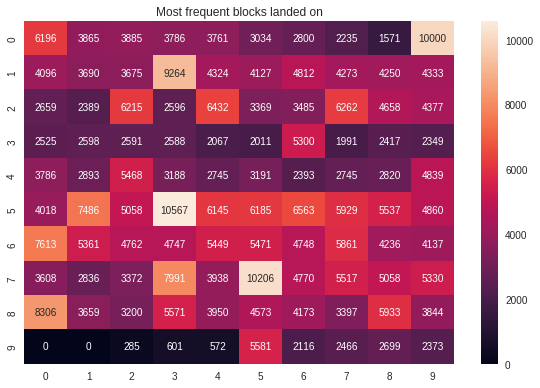

In [ ]:
# heatmap of the most frequent blocks landed on
board_heatmap = np.asarray(total_squares).reshape(10,10) # to simulate the board
board_heatmap = np.flip(board_heatmap, axis=0)
d = pd.DataFrame(board_heatmap)
d.iloc[::2,:] = d.iloc[::2, ::-1]
ax = sns.heatmap(d,annot=True,fmt="")
ax.set(xlabel="", ylabel="",title='Most frequent blocks landed on')

Text(0.5, 1.0, 'Cumulative function to finish a game in n-number of rolls ')

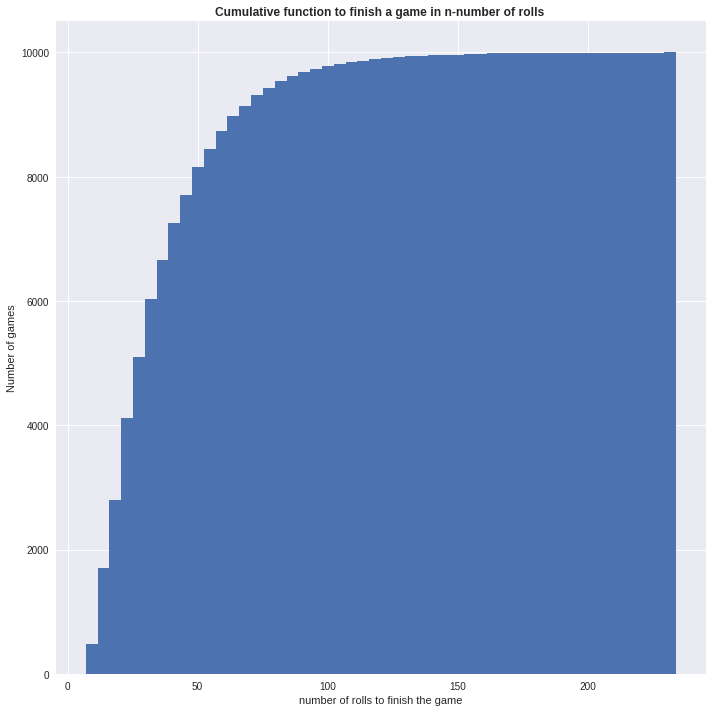

In [ ]:
plt.hist(rolls_t,bins=50,cumulative=True)
plt.xlabel('number of rolls to finish the game')
plt.ylabel('Number of games')
plt.title('Cumulative function to finish a game in n-number of rolls ',
          fontweight ="bold")
